Nama : Mahesa Tirta Panjalu </br>
Kode : PYTN-KS18-012

# Import Library

In [1]:
import numpy as np
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Split Dataset and Standarize the Datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Evaluate  Models
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Visualization Decision Tree
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

# Read Dataset

In [2]:
# Membaca Dataset
bank_add_full = pd.read_csv('./../Dataset/bank_marketing/bank-additional-full.csv', sep=';', quoting=2)
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Membaca Dataset
bank_add = pd.read_csv('./../Dataset/bank_marketing/bank-additional.csv', sep=';', quoting=2)
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# Membaca Dataset
bank_full = pd.read_csv('../Dataset/bank_marketing/bank-full.csv', sep=';', quoting=2)
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [5]:
# Membaca Dataset
bank = pd.read_csv('../Dataset/bank_marketing/bank.csv', sep=';', quoting=2)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no


# Data Cleaning

## Cleaning Data bank_add_full

In [6]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank_add_full.shape

(41188, 21)

In [9]:
bank_add_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
bank_add_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
print(bank_add_full['job'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [12]:
len(bank_add_full[bank_add_full['default']=='unknown'])

8597

In [13]:
# Melihat jumlah value unknown
for column in bank_add_full.columns:
    unknown_count = bank_add_full[bank_add_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 330
Jumlah nilai 'unknown' pada kolom marital: 80
Jumlah nilai 'unknown' pada kolom education: 1731
Jumlah nilai 'unknown' pada kolom default: 8597
Jumlah nilai 'unknown' pada kolom housing: 990
Jumlah nilai 'unknown' pada kolom loan: 990
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank_add_full data kosong di beri dengan value unknown

## Cleaning Data bank_add

In [14]:
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [15]:
bank_add.shape

(4119, 21)

In [16]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [17]:
bank_add.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
bank_add.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
# Melihat jumlah value unknown
for column in bank_add.columns:
    unknown_count = bank_add[bank_add[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 39
Jumlah nilai 'unknown' pada kolom marital: 11
Jumlah nilai 'unknown' pada kolom education: 167
Jumlah nilai 'unknown' pada kolom default: 803
Jumlah nilai 'unknown' pada kolom housing: 105
Jumlah nilai 'unknown' pada kolom loan: 105
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank_add data kosong di beri dengan value unknown

## Cleaning Data bank_full

In [20]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [21]:
bank_full.shape

(45211, 17)

In [22]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  float64
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


In [23]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
# Melihat jumlah value unknown
for column in bank_full.columns:
    unknown_count = bank_full[bank_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 288
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 1857
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom balance: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 13020
Jumlah nilai 'unknown' pada kolom day: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 36959
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank_full data kosong di beri dengan value unknown

## Cleaning data bank

In [26]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no


In [27]:
bank.shape

(4521, 17)

In [28]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   float64
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(7), object(10)
memory usage: 600.6+ KB


In [29]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [30]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
# Melihat jumlah value unknown
for column in bank.columns:
    unknown_count = bank[bank[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 38
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 187
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom balance: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 1324
Jumlah nilai 'unknown' pada kolom day: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 3705
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank data kosong di beri dengan value unknown

# Preprocessing Data

## Data bank_add_full dan bank_add
### bank_add_full

In [32]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [34]:
# Melihat jumlah value unknown
for column in bank_add_full.columns:
    unknown_count = bank_add_full[bank_add_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 330
Jumlah nilai 'unknown' pada kolom marital: 80
Jumlah nilai 'unknown' pada kolom education: 1731
Jumlah nilai 'unknown' pada kolom default: 8597
Jumlah nilai 'unknown' pada kolom housing: 990
Jumlah nilai 'unknown' pada kolom loan: 990
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


In [35]:
# Membuat fungsi untuk mengisi nilai unknown menjadi modus pada dataset
def input_unknown(df):
    for column in df.columns:
        unknown_count = df[df[column] == 'unknown'][column].count()
        if unknown_count > 0:
            most_common_value = df[column].mode()[0]
            df.loc[df[column] == 'unknown', column] = most_common_value
            
    return df

In [36]:
#Menjalankan fungsi input_unknown
bank_add_full_clear = input_unknown(bank_add_full)
bank_add_full_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
# Melihat jumlah value unknown
for column in bank_add_full_clear.columns:
    unknown_count = bank_add_full_clear[bank_add_full_clear[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 0
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 0
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


In [38]:
print(bank_add_full_clear['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [39]:
# Melakukan encoding terhadap kolom kategori
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col in categorical_columns:
    bank_add_full_clear[col] = label_encoder.fit_transform(bank_add_full_clear[col])
    
bank_add_full_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,0,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,1,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,1,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [40]:
bank_add_full_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [41]:
# Membagi kolom X dan y untuk melakukan training  model machine learning
X = bank_add_full_clear.drop(columns='y')
y = bank_add_full_clear['y']

In [42]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,0,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,1,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,1,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,5,1,5,0,1,0,0,7,0,334.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,1,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [44]:
# Melakukan standarisasi skalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [45]:
X_train

array([[ 1.53303429, -0.17929992, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.5110194 , -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

### bank_add

In [46]:
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [47]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [48]:
# Melihat jumlah value unknown
for column in bank_add.columns:
    unknown_count = bank_add[bank_add[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 39
Jumlah nilai 'unknown' pada kolom marital: 11
Jumlah nilai 'unknown' pada kolom education: 167
Jumlah nilai 'unknown' pada kolom default: 803
Jumlah nilai 'unknown' pada kolom housing: 105
Jumlah nilai 'unknown' pada kolom loan: 105
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


In [49]:
#Menjalankan fungsi input_unknown
bank_add_clear = input_unknown(bank_add)
bank_add_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,yes,no,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [50]:
# Melakukan encoding terhadap kolom kategori
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col in categorical_columns:
    bank_add_clear[col] = label_encoder.fit_transform(bank_add_clear[col])
    
bank_add_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,1,0,0,6,0,487.0,2.0,999.0,0.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,346.0,4.0,999.0,0.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,1,0,1,4,4,227.0,1.0,999.0,0.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,0,1,4,0,17.0,3.0,999.0,0.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,1,0,0,7,1,58.0,1.0,999.0,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [51]:
print(bank_add_clear['y'].value_counts())

0    3668
1     451
Name: y, dtype: int64


In [52]:
# Membagi data menjadi X_test dan y_test untuk menguji model machine learning
X_test = bank_add_clear.drop(columns='y')
y_test = bank_add_clear['y']

**NOTE:**</br>
Variabbel untuk melakukan training model machine learning : **X**, **y** untuk algoritma yang membutuhkan standarisasi skalar menggunakan **X_train**, **y** </br>
Variabel untuk melakukan testing model machine learning : **X_test**, **y_test**

## Data bank_full dan bank

### bank_full

In [53]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [54]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  float64
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


In [55]:
bank_full.shape

(45211, 17)

In [56]:
# Melihat jumlah value unknown
for column in bank_full.columns:
    unknown_count = bank_full[bank_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 288
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 1857
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom balance: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 13020
Jumlah nilai 'unknown' pada kolom day: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 36959
Jumlah nilai 'unknown' pada kolom y: 0


In [57]:
bank_full['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [58]:
bank_full['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [59]:
bank_full['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [60]:
bank_full['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [61]:
#Menjalankan fungsi input_unknown
bank_full_clear = input_unknown(bank_full)
bank_full_clear.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,blue-collar,single,secondary,no,1.0,no,no,cellular,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [62]:
#Melakukan encoding terhadap kolom kategori
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col in categorical_columns:
    bank_full_clear[col] = label_encoder.fit_transform(bank_full_clear[col])
    
bank_full_clear.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,1,2,0,2143.0,1,0,0,5.0,8,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,0,5.0,8,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,0,5.0,8,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,1,0,1506.0,1,0,0,5.0,8,92.0,1.0,-1.0,0.0,3,0
4,33.0,1,2,1,0,1.0,0,0,0,5.0,8,198.0,1.0,-1.0,0.0,3,0


In [63]:
bank_full_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int32  
 2   marital    45211 non-null  int32  
 3   education  45211 non-null  int32  
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int32  
 9   day        45211 non-null  float64
 10  month      45211 non-null  int32  
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  int32  
 16  y          45211 non-null  int32  
dtypes: float64(7), int32(10)
memory usage: 4.1 MB


In [64]:
# Membagi kolom fitur dan target untuk melakukan training  model machine learning
fitur = bank_full_clear.drop(columns='y')
target = bank_full_clear['y']

In [65]:
fitur

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,4,1,2,0,2143.0,1,0,0,5.0,8,261.0,1.0,-1.0,0.0,3
1,44.0,9,2,1,0,29.0,1,0,0,5.0,8,151.0,1.0,-1.0,0.0,3
2,33.0,2,1,1,0,2.0,1,1,0,5.0,8,76.0,1.0,-1.0,0.0,3
3,47.0,1,1,1,0,1506.0,1,0,0,5.0,8,92.0,1.0,-1.0,0.0,3
4,33.0,1,2,1,0,1.0,0,0,0,5.0,8,198.0,1.0,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,825.0,0,0,0,17.0,9,977.0,3.0,-1.0,0.0,3
45207,71.0,5,0,0,0,1729.0,0,0,0,17.0,9,456.0,2.0,-1.0,0.0,3
45208,72.0,5,1,1,0,5715.0,0,0,0,17.0,9,1127.0,5.0,184.0,3.0,2
45209,57.0,1,1,1,0,668.0,0,0,1,17.0,9,508.0,4.0,-1.0,0.0,3


In [66]:
target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [67]:
# Melakukan standarisasi skalar
scaler = StandardScaler()
fitur_train = scaler.fit_transform(fitur)

In [68]:
fitur_train

array([[ 1.60696496, -0.08521676, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [ 0.28852927,  1.45822324,  1.3683719 , ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.74738448, -0.70259276, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       ...,
       [ 2.92540065,  0.22347124, -0.27576178, ...,  1.43618859,
         1.05047333, -0.56617504],
       [ 1.51279098, -1.01128076, -0.27576178, ..., -0.41145311,
        -0.25194037,  0.44489814],
       [-0.37068857, -0.70259276, -0.27576178, ...,  1.4761376 ,
         4.52357654, -1.57724822]])

### data bank

In [69]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no


In [70]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   float64
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(7), object(10)
memory usage: 600.6+ KB


In [71]:
bank.shape

(4521, 17)

In [72]:
# Melihat jumlah value unknown
for column in bank.columns:
    unknown_count = bank[bank[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 38
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 187
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom balance: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 1324
Jumlah nilai 'unknown' pada kolom day: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 3705
Jumlah nilai 'unknown' pada kolom y: 0


In [73]:
# menjalankan fungsi input_unknown
bank_clear = input_unknown(bank)
bank_clear.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,cellular,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,cellular,5.0,may,226.0,1.0,-1.0,0.0,unknown,no


In [74]:
# Melakukan Encoding terhadap kolom kategori
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col in categorical_columns:
    bank_clear[col] = label_encoder.fit_transform(bank_clear[col])
    
bank_clear.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,10,1,0,0,1787.0,0,0,0,19.0,10,79.0,1.0,-1.0,0.0,3,0
1,33.0,7,1,1,0,4789.0,1,1,0,11.0,8,220.0,1.0,339.0,4.0,0,0
2,35.0,4,2,2,0,1350.0,1,0,0,16.0,0,185.0,1.0,330.0,1.0,0,0
3,30.0,4,1,2,0,1476.0,1,1,0,3.0,6,199.0,4.0,-1.0,0.0,3,0
4,59.0,1,1,1,0,0.0,1,0,0,5.0,8,226.0,1.0,-1.0,0.0,3,0


In [75]:
bank_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   int32  
 2   marital    4521 non-null   int32  
 3   education  4521 non-null   int32  
 4   default    4521 non-null   int32  
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   int32  
 7   loan       4521 non-null   int32  
 8   contact    4521 non-null   int32  
 9   day        4521 non-null   float64
 10  month      4521 non-null   int32  
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   int32  
 16  y          4521 non-null   int32  
dtypes: float64(7), int32(10)
memory usage: 424.0 KB


In [76]:
# Membagi kolom fitur_test dan target_test untuk melakukan testing  model machine learning
fitur_test = bank_clear.drop(columns='y')
target_test = bank_clear['y']

In [77]:
fitur_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30.0,10,1,0,0,1787.0,0,0,0,19.0,10,79.0,1.0,-1.0,0.0,3
1,33.0,7,1,1,0,4789.0,1,1,0,11.0,8,220.0,1.0,339.0,4.0,0
2,35.0,4,2,2,0,1350.0,1,0,0,16.0,0,185.0,1.0,330.0,1.0,0
3,30.0,4,1,2,0,1476.0,1,1,0,3.0,6,199.0,4.0,-1.0,0.0,3
4,59.0,1,1,1,0,0.0,1,0,0,5.0,8,226.0,1.0,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,7,1,1,0,-333.0,1,0,0,30.0,5,329.0,5.0,-1.0,0.0,3
4517,57.0,6,1,2,1,-3313.0,1,1,0,9.0,8,153.0,1.0,-1.0,0.0,3
4518,57.0,9,1,1,0,295.0,0,0,0,19.0,1,151.0,11.0,-1.0,0.0,3
4519,28.0,1,1,1,0,1137.0,0,0,0,6.0,3,129.0,4.0,211.0,3.0,1


In [78]:
#Melakukan standarisai skalar
fitur_test_scl = scaler.fit_transform(fitur_test)

In [79]:
fitur_test_scl

array([[-1.05626965,  1.7657156 , -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-0.77258281,  0.82777644, -0.24642938, ...,  2.98904408,
         2.04173372, -2.57996071],
       [-0.58345826, -0.11016273,  1.42139579, ...,  2.89914302,
         0.27012381, -2.57996071],
       ...,
       [ 1.49691189,  1.45306921, -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-1.24539421, -1.04810189, -0.24642938, ...,  1.71045119,
         1.45119709, -1.57183605],
       [ 0.26760226, -0.7354555 ,  1.42139579, ...,  2.09003345,
         3.81334363, -1.57183605]])

**NOTE:**</br>
Variabbel untuk melakukan training model machine learning : **fitur**, **target** untuk algoritma yang membutuhkan standarisasi skalar menggunakan **fitur_train**, **target** </br>
Variabel untuk melakukan testing model machine learning : **fitur_test**, **target_test**

# Pembuatan Model Machine Learning Bank Additional

## Logistic Regression

In [80]:
# Membuat model dan mentraining model machine learning
model_logis = LogisticRegression(solver='liblinear', C=0.001, random_state=42, max_iter=100)
model_logis.fit(X_train,y)

LogisticRegression(C=0.001, random_state=42, solver='liblinear')

In [81]:
# Melakukan prediksi pada variabel training dan testing
y_logis = model_logis.predict(X_train)
y_logis_pred = model_logis.predict(X_test)

In [82]:
# Menampilkan hasil prediksi 
print("Akurasi training: ", accuracy_score(y, y_logis))
print("Akurasi Uji: ", accuracy_score(y_test, y_logis_pred))
print(classification_report(y_test, y_logis_pred))

Akurasi training:  0.9079829076430028
Akurasi Uji:  0.8907501820830298
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.67      0.00      0.01       451

    accuracy                           0.89      4119
   macro avg       0.78      0.50      0.48      4119
weighted avg       0.87      0.89      0.84      4119



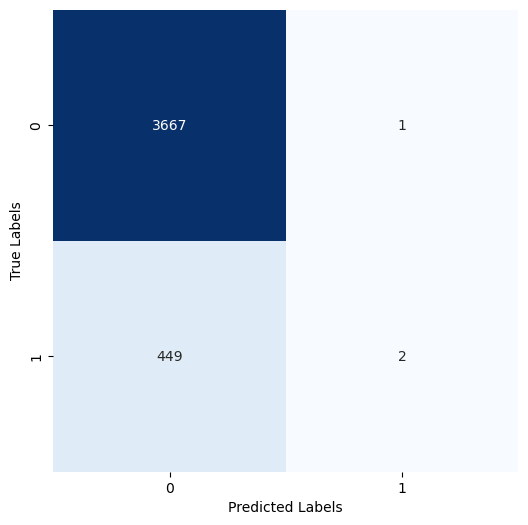

In [83]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_logis_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## K-Nearest Neighbor (KNN)

In [84]:
# Membuat model dan mentraining model machine learning
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y)

KNeighborsClassifier(n_neighbors=3)

In [85]:
# Melakukan prediksi pada variabel training dan testing
X_test_scl = scaler.fit_transform(X_test)
y_knn_pred = model_knn.predict(X_test_scl)
y_knn = model_knn.predict(X_train)

In [86]:
# Melihat hasil akurasi prediksi
print("Akurasi Training: ", accuracy_score(y, y_knn))
print("Akurasi Uji: ", accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

Akurasi Training:  0.9407594444983975
Akurasi Uji:  0.9410050983248361
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3668
           1       0.78      0.64      0.70       451

    accuracy                           0.94      4119
   macro avg       0.87      0.81      0.84      4119
weighted avg       0.94      0.94      0.94      4119



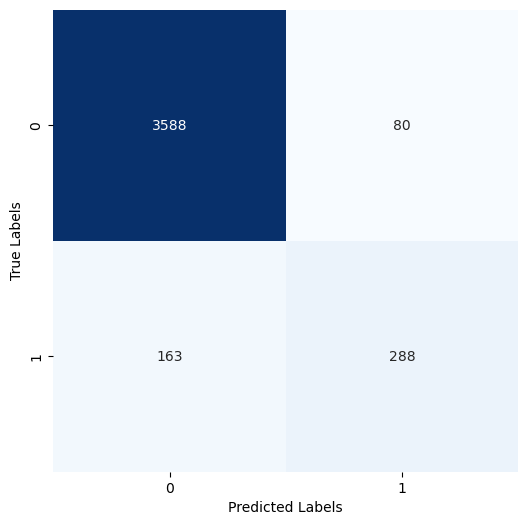

In [87]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [88]:
# Membuat perulangan untuk menyimpan hasil error model KNN
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y)
    pred_i = model_knn.predict(X_test_scl)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

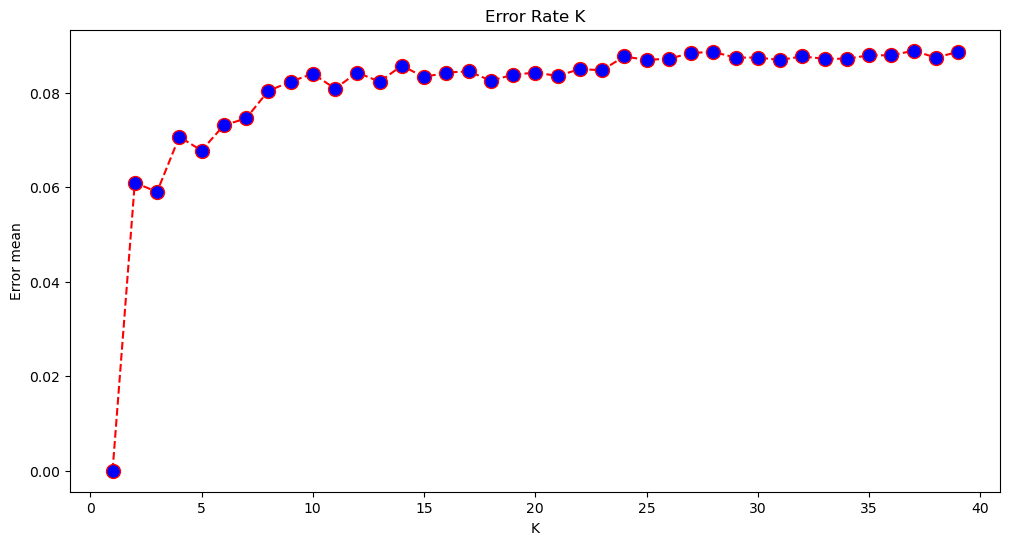

In [89]:
# Menampilkan plot error model KNN
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [90]:
# Membuat model dan mentraining model machine learning
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y)

KNeighborsClassifier(n_neighbors=3)

In [91]:
# Melakukan prediksi pada variabel training dan testing
y_knn = model_knn.predict(X_train)
y_knn_pred = model_knn.predict(X_test_scl)

In [92]:
# Melihat hasil akurasi prediksi
print("Akurasi Training: ", accuracy_score(y, y_knn))
print("Akurasi Uji: ", accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

Akurasi Training:  0.9407594444983975
Akurasi Uji:  0.9410050983248361
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3668
           1       0.78      0.64      0.70       451

    accuracy                           0.94      4119
   macro avg       0.87      0.81      0.84      4119
weighted avg       0.94      0.94      0.94      4119



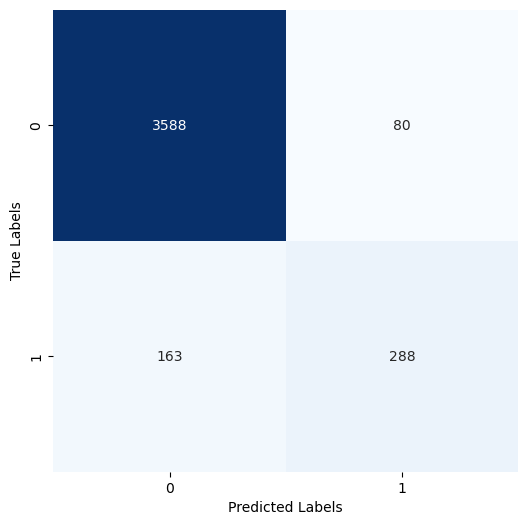

In [93]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_knn_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Support Vector Machine

In [94]:
# Membuat model dan mentraining model machine learning
model_svm = SVC(kernel='rbf', C=1.0, random_state=42, gamma=0.1)
model_svm.fit(X_train, y)

SVC(gamma=0.1, random_state=42)

In [95]:
# Melakukan prediksi pada variabel training dan testing
y_svm = model_svm.predict(X_train)
y_svm_pred = model_svm.predict(X_test)

In [96]:
# Melihat hasil akurasi prediksi
print("Akurasi Training: ", accuracy_score(y, y_svm))
print("Akurasi Uji: ", accuracy_score(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))

Akurasi Training:  0.9298096532970768
Akurasi Uji:  0.890507404709881
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.00      0.00      0.00       451

    accuracy                           0.89      4119
   macro avg       0.45      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119



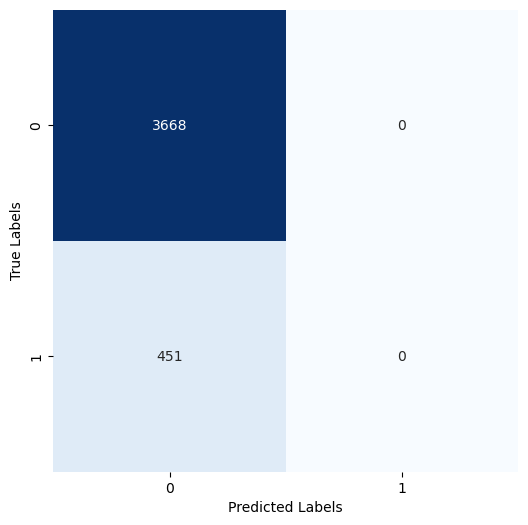

In [97]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_svm_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Decision Tree

In [98]:
# Membuat model dan mentraining model machine learning
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [99]:
# Melakukan prediksi pada variabel training dan testing
y_tre =  model_tree.predict(X)
y_tree_pred = model_tree.predict(X_test)

In [100]:
# Melihat hasil akurasi prediksi
print("Akurasi Training: ", accuracy_score(y, y_tre))
print("Akurasi Uji: ", accuracy_score(y_test, y_tree_pred))
print(classification_report(y_test, y_tree_pred))

Akurasi Training:  0.9092454112848403
Akurasi Uji:  0.9128429230395727
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3668
           1       0.60      0.60      0.60       451

    accuracy                           0.91      4119
   macro avg       0.78      0.78      0.78      4119
weighted avg       0.91      0.91      0.91      4119



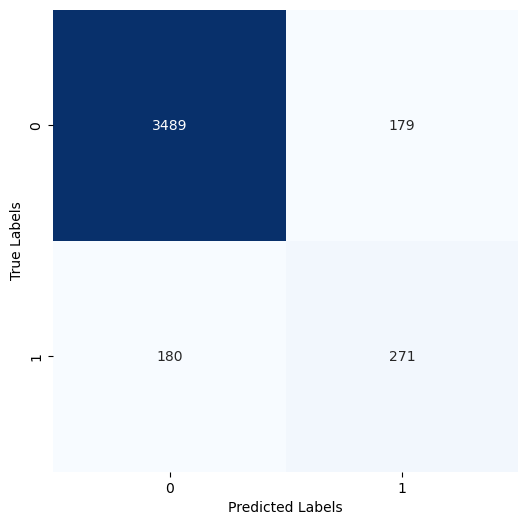

In [101]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_tree_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

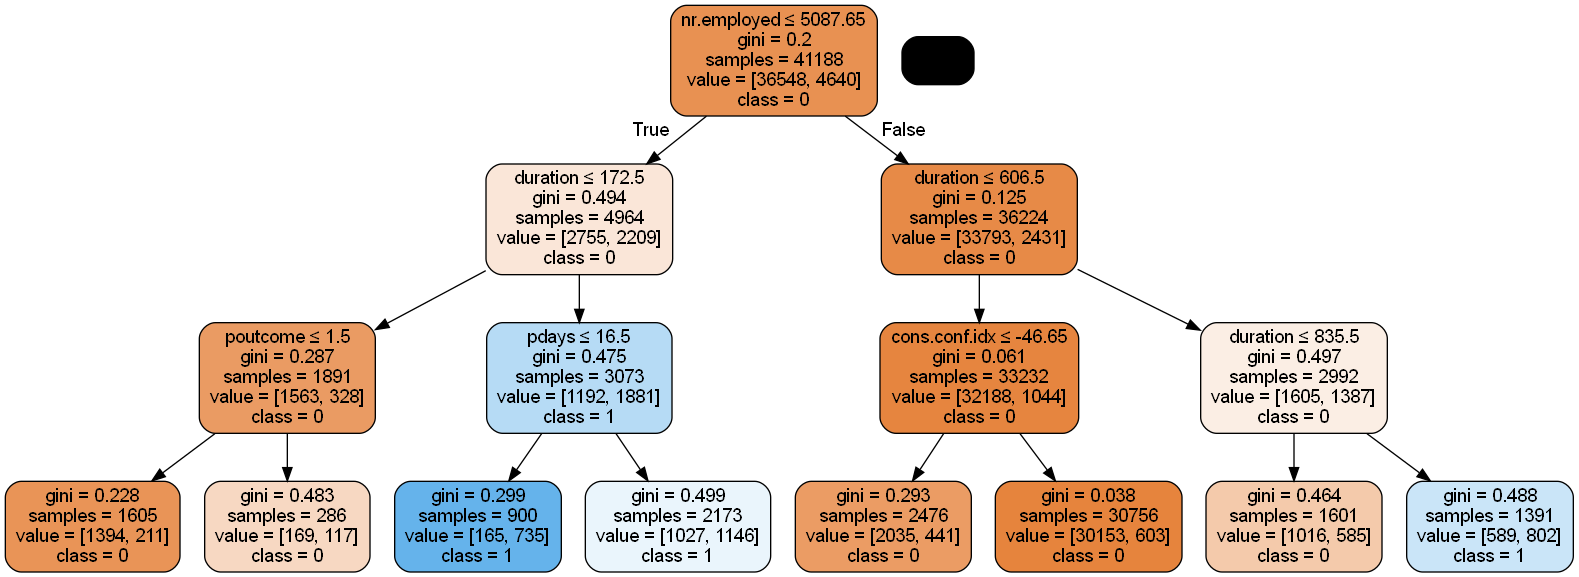

In [102]:
# Membuat diagram tree untuk melihat fitur pada tiap-tiap leaf
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
dot_data = StringIO()
tree.export_graphviz(model_tree,
                     out_file=dot_data,
                     class_names=['0', '1'],  # the target names.
                     feature_names=feature_cols,  # the feature names.
                     filled=True,  # Whether to fill in the boxes with colours.
                     # Whether to round the corners of the boxes.
                     rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

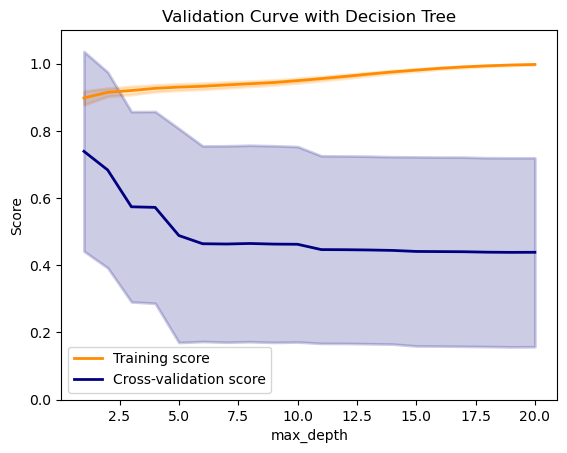

In [103]:
# Menyimpan score model pada setiap maximal kedalaman daun 
# Range nilai untuk hyperparameter max_depth
param_range = np.arange(1, 21)

# Menghitung validation curve
train_scores, test_scores = validation_curve(
    model_tree, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Menghitung rata-rata dan standard deviation dari skor training dan testing
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [104]:
# Membuat model dan mentraining model machine learning
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=42)
model_tree.fit(X, y)

DecisionTreeClassifier(max_depth=12, random_state=42)

In [105]:
# Melakukan prediksi pada variabel training dan testing
y_tre =  model_tree.predict(X)
y_tree_pred = model_tree.predict(X_test)

In [106]:
# Melihat hasil akurasi prediksi
print("Akurasi Training: ", accuracy_score(y, y_tre))
print("Akurasi Uji: ", accuracy_score(y_test, y_tree_pred))
print(classification_report(y_test, y_tree_pred))

Akurasi Training:  0.9520491405263669
Akurasi Uji:  0.9531439669822772
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3668
           1       0.82      0.73      0.77       451

    accuracy                           0.95      4119
   macro avg       0.90      0.85      0.87      4119
weighted avg       0.95      0.95      0.95      4119



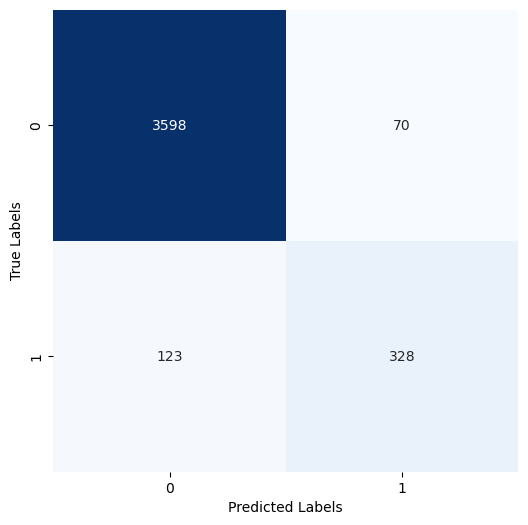

In [107]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_tree_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Random Forest

In [137]:
# Buat model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

# Training model
model_rf.fit(X, y)

# Uji model
y_rf = model_rf.predict(X)
y_rf_pred = model_rf.predict(X_test)

#Cetak Hasil Akurasi
print("Akurasi training: ", accuracy_score(y, y_rf))
print("Akurasi testing: ", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Akurasi training:  1.0
Akurasi testing:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3668
           1       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119



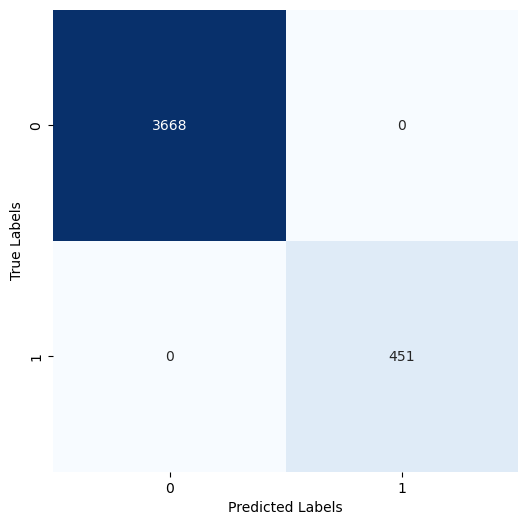

In [138]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Naive Bayes

In [110]:
# Buat model Naive Bayes
model_nb = GaussianNB()

# Training model
model_nb.fit(X,y)

# Uji model
y_nb = model_nb.predict(X)
y_nb_pred = model_nb.predict(X_test)

#Cetak Hasil Akurasi
print("Akurasi training: ", accuracy_score(y, y_nb))
print("Akurasi testing: ", accuracy_score(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred))

Akurasi training:  0.83837525492862
Akurasi testing:  0.8361252731245448
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3668
           1       0.36      0.62      0.45       451

    accuracy                           0.84      4119
   macro avg       0.65      0.74      0.68      4119
weighted avg       0.88      0.84      0.85      4119



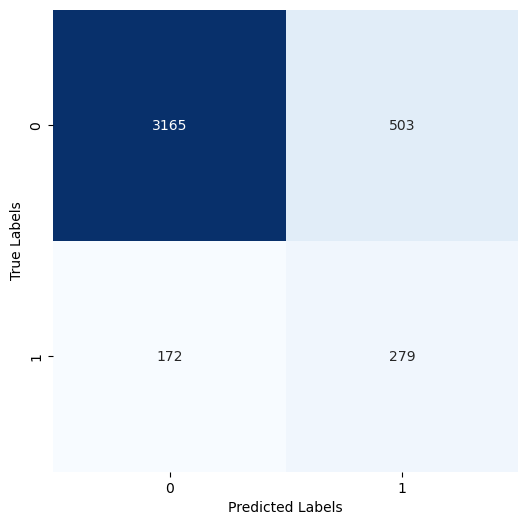

In [111]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(y_test, y_nb_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**KESIMPULAN:** Pada dataset bank additional memiliki akurasi yang tinggi yaitu 100% pada algoritma **Random Forest** dengan menggunakan classification report hasil dari setiap parameter menunjukan 100% yang mengakibatkan algoritma random forest menjadi algoritma yang sangat cocok pada dataset bank additional.

# Pembuatan Model Machine Learning Bank

## Logistic Regression

In [112]:
# Membuat model dan mentraining model machine learning
model_logis_bank = LogisticRegression(solver='liblinear', C=0.1, random_state=42, max_iter=100)
model_logis_bank.fit(fitur, target)

# Melakukan prediksi pada variabel training dan testing
y_bank_logis = model_logis_bank.predict(fitur)
y_bank_logis_pred = model_logis_bank.predict(fitur_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(target, y_bank_logis))
print("Akurasi Uji: ", accuracy_score(target_test, y_bank_logis_pred))
print(classification_report(target_test, y_bank_logis_pred))

Akurasi training:  0.8906460817057795
Akurasi Uji:  0.8896261888962619
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.56      0.19      0.29       521

    accuracy                           0.89      4521
   macro avg       0.73      0.59      0.61      4521
weighted avg       0.86      0.89      0.87      4521



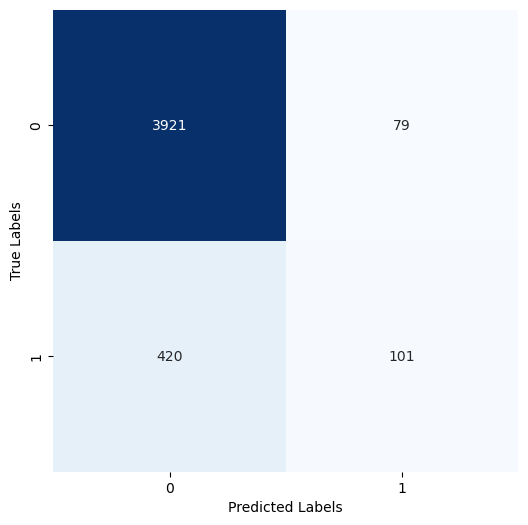

In [113]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_logis_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## K-Nearest Neighbor (KNN)

In [114]:
# Membuat model dan mentraining model machine learning
model_bank_knn = KNeighborsClassifier(n_neighbors=3)
model_bank_knn.fit(fitur_train, target)

# Melakukan prediksi pada variabel training dan testing
y_bank_knn = model_logis_bank.predict(fitur_train)
y_bank_knn_pred = model_logis_bank.predict(fitur_test_scl)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(target, y_bank_knn))
print("Akurasi Uji: ", accuracy_score(target_test, y_bank_knn_pred))
print(classification_report(target_test, y_bank_knn_pred))

Akurasi training:  0.8829046028621353
Akurasi Uji:  0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



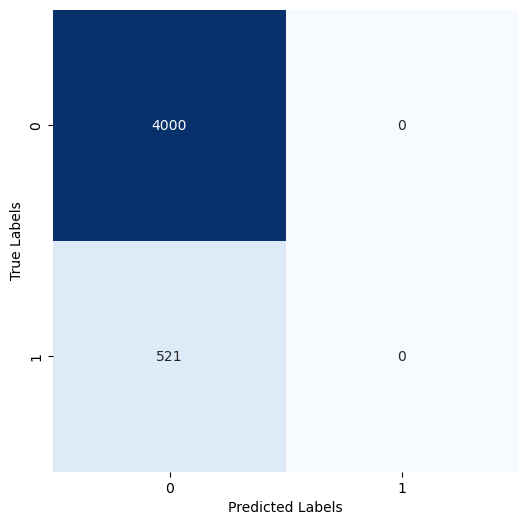

In [116]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_knn_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [120]:
# Membuat perulangan untuk menyimpan hasil error model KNN
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(fitur_train, target)
    pred_i = model_knn.predict(fitur_test_scl)
    error.append(np.mean(pred_i != target_test))

Text(0, 0.5, 'Error mean')

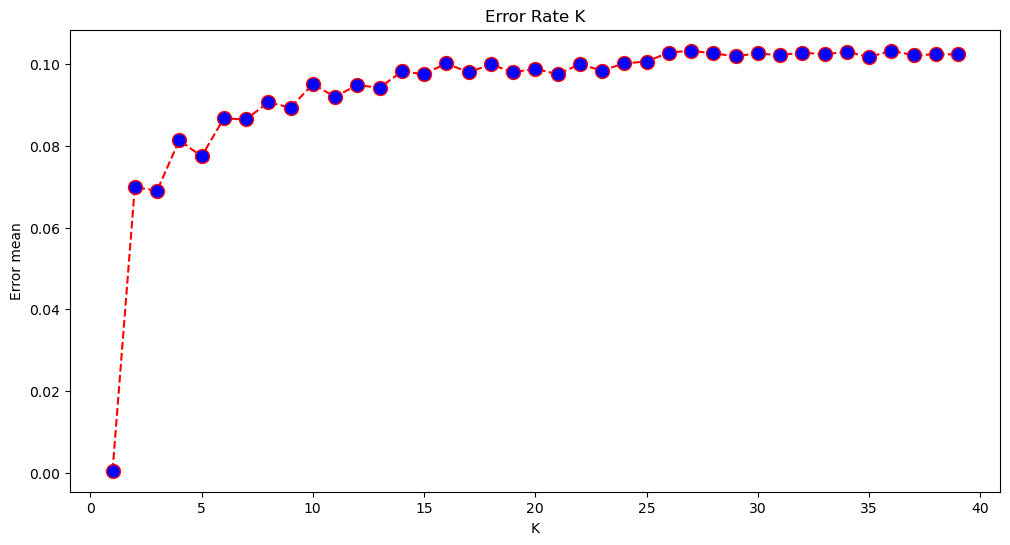

In [121]:
# Menampilkan plot error model KNN
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [122]:
# Membuat model dan mentraining model machine learning
model_bank_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_bank_knn.fit(fitur_train, target)

# Melakukan prediksi pada variabel training dan testing
y_bank_knn = model_logis_bank.predict(fitur_train)
y_bank_knn_pred = model_logis_bank.predict(fitur_test_scl)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(target, y_bank_knn))
print("Akurasi Uji: ", accuracy_score(target_test, y_bank_knn_pred))
print(classification_report(target_test, y_bank_knn_pred))

Akurasi training:  0.8829046028621353
Akurasi Uji:  0.8847600088476001
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



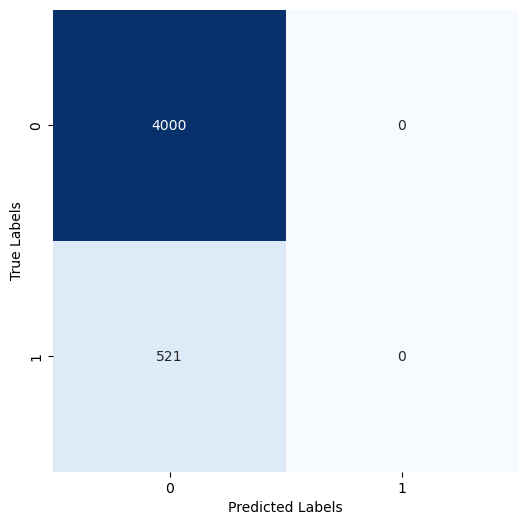

In [123]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_knn_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Support Vector Machine

In [124]:
# Membuat model dan mentraining model machine learning
model_bank_svm = SVC(kernel='rbf', C=1.0, random_state=42, gamma=0.1)
model_bank_svm.fit(fitur, target)

# Melakukan prediksi pada variabel training dan testing
y_bank_svm = model_bank_svm.predict(fitur)
y_bank_svm_pred = model_bank_svm.predict(fitur_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(target, y_bank_svm))
print("Akurasi Uji: ", accuracy_score(target_test, y_bank_svm_pred))
print(classification_report(target_test, y_bank_svm_pred))

Akurasi training:  0.9999557629780363
Akurasi Uji:  0.9984516699845167
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.99      0.99       521

    accuracy                           1.00      4521
   macro avg       1.00      0.99      1.00      4521
weighted avg       1.00      1.00      1.00      4521



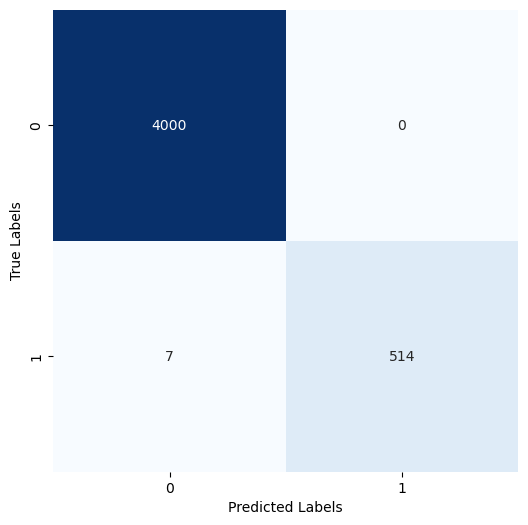

In [125]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_svm_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Decision Tree

In [126]:
# Membuat model dan mentraining model machine learning
model_bank_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model_bank_tree.fit(fitur, target)

# Melakukan prediksi pada variabel training dan testing
y_bank_tree = model_bank_tree.predict(fitur)
y_bank_tree_pred = model_bank_tree.predict(fitur_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(target, y_bank_tree))
print("Akurasi Uji: ", accuracy_score(target_test, y_bank_tree_pred))
print(classification_report(target_test, y_bank_tree_pred))

Akurasi training:  0.8916635332109443
Akurasi Uji:  0.88940499889405
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4000
           1       0.53      0.33      0.41       521

    accuracy                           0.89      4521
   macro avg       0.72      0.65      0.67      4521
weighted avg       0.87      0.89      0.88      4521



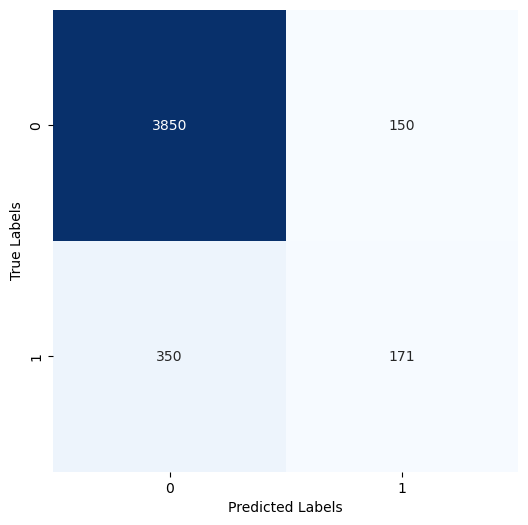

In [127]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_tree_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

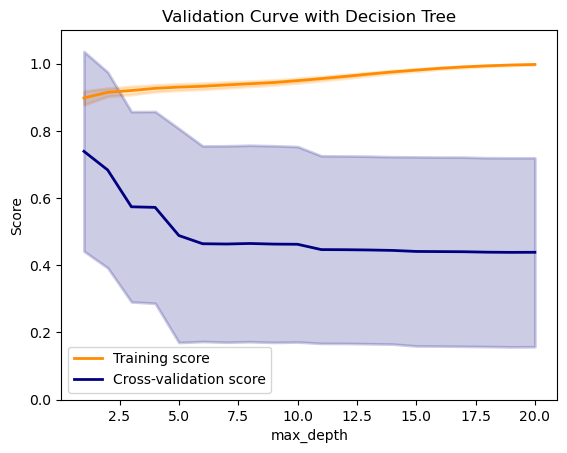

In [128]:
# Menyimpan score model pada setiap maximal kedalaman daun 
# Range nilai untuk hyperparameter max_depth
param_range = np.arange(1, 21)

# Menghitung validation curve
train_scores, test_scores = validation_curve(
    model_bank_tree, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Menghitung rata-rata dan standard deviation dari skor training dan testing
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [131]:
# Membuat model dan mentraining model machine learning
model_bank_tree = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=42)
model_bank_tree.fit(fitur, target)

# Melakukan prediksi pada variabel training dan testing
y_bank_tree = model_bank_tree.predict(fitur)
y_bank_tree_pred = model_bank_tree.predict(fitur_test)

# Melihat hasil akurasi prediksi
print("Akurasi training: ", accuracy_score(target, y_bank_tree))
print("Akurasi Uji: ", accuracy_score(target_test, y_bank_tree_pred))
print(classification_report(target_test, y_bank_tree_pred))

Akurasi training:  0.9411647607883037
Akurasi Uji:  0.9440389294403893
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4000
           1       0.83      0.65      0.73       521

    accuracy                           0.94      4521
   macro avg       0.89      0.82      0.85      4521
weighted avg       0.94      0.94      0.94      4521



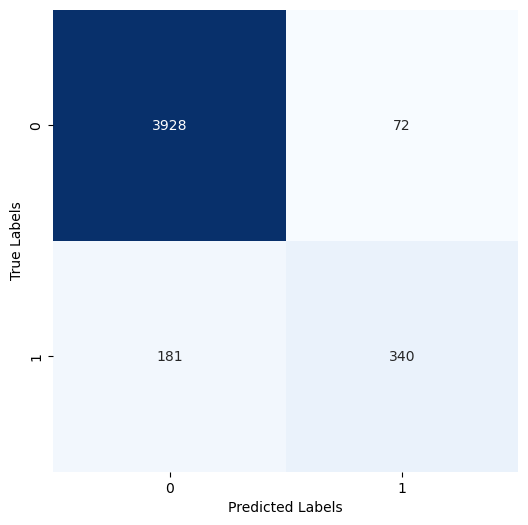

In [132]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_tree_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Random Forest

In [133]:
# Buat model Naive Bayes
model_bank_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

# Training model
model_bank_rf.fit(fitur, target)

# Uji model
y_bank_rf = model_bank_rf.predict(fitur)
y_bank_rf_pred = model_bank_rf.predict(fitur_test)

#Cetak Hasil Akurasi
print("Akurasi training: ", accuracy_score(target, y_bank_rf))
print("Akurasi testing: ", accuracy_score(target_test, y_bank_rf_pred))
print(classification_report(target_test, y_bank_rf_pred))

Akurasi training:  1.0
Akurasi testing:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



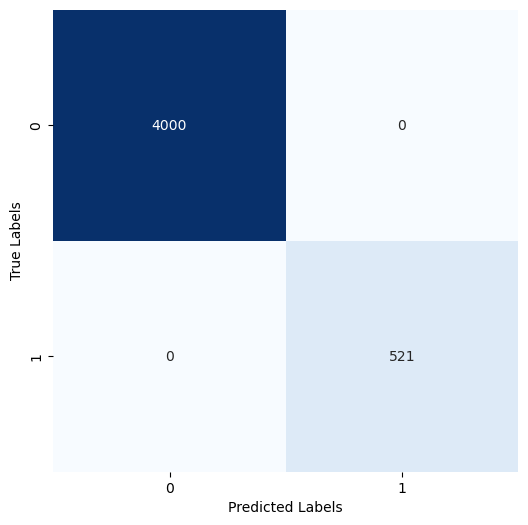

In [134]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Naive Bayes

In [135]:
# Buat model Naive Bayes
model_bank_nb = GaussianNB()

# Training model
model_bank_nb.fit(fitur, target)

# Uji model
y_bank_nb = model_bank_nb.predict(fitur)
y_bank_nb_pred = model_bank_nb.predict(fitur_test)

#Cetak Hasil Akurasi
print("Akurasi training: ", accuracy_score(target, y_bank_nb))
print("Akurasi testing: ", accuracy_score(target_test, y_bank_nb_pred))
print(classification_report(target_test, y_bank_nb_pred))

Akurasi training:  0.8529782575037048
Akurasi testing:  0.849590798495908
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4000
           1       0.36      0.40      0.38       521

    accuracy                           0.85      4521
   macro avg       0.64      0.65      0.65      4521
weighted avg       0.86      0.85      0.85      4521



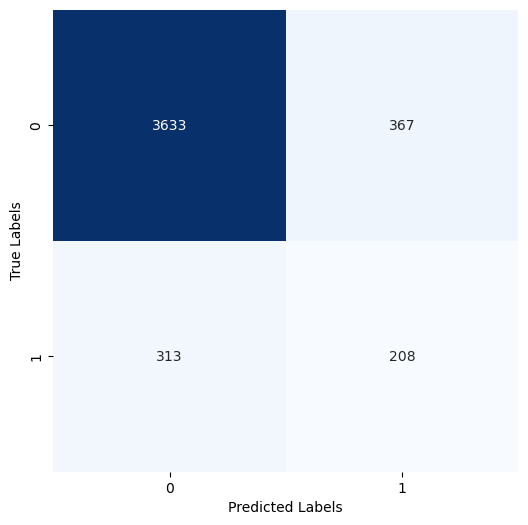

In [136]:
# Buat matriks konfusi dari hasil prediksi testing model machine learning
cm = confusion_matrix(target_test, y_bank_nb_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**KESIMPULAN:** Pada dataset Bank memiliki akurasi yang tinggi yaitu 100% pada algoritma **Random Forest** dengan menggunakan classification report hasil dari setiap parameter menunjukan 100% yang mengakibatkan algoritma random forest menjadi algoritma yang sangat cocok pada dataset Bank.